In [29]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv("fraud.csv")

In [31]:
df.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [32]:
df.tail(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0
594642,179,'C616528518','4','F','28007','M1823072687','28007','es_transportation',26.93,0


In [33]:
df.isna().sum()

,0
step,0
customer,0
age,0
gender,0
zipcodeOri,0
merchant,0
zipMerchant,0
category,0
amount,0
fraud,0


In [34]:
null_rows = df[df.isnull().any(axis=1)]
print("Number of rows with null values:", len(null_rows))
print(null_rows)

Number of rows with null values: 0
Empty DataFrame
Columns: [step, customer, age, gender, zipcodeOri, merchant, zipMerchant, category, amount, fraud]
Index: []


In [35]:
df = df.dropna()
null_rows = df[df.isnull().any(axis=1)]
print("Number of rows with null values:", len(null_rows))
print(null_rows)

Number of rows with null values: 0
Empty DataFrame
Columns: [step, customer, age, gender, zipcodeOri, merchant, zipMerchant, category, amount, fraud]
Index: []


In [36]:
df = df.applymap(lambda x: x.strip("'") if isinstance(x, str) else x)
df

<ipython-input-36-e42e674888d7>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip("'") if isinstance(x, str) else x)


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,C1753498738,3,F,28007,M1823072687,28007,es_transportation,20.53,0
594639,179,C650108285,4,F,28007,M1823072687,28007,es_transportation,50.73,0
594640,179,C123623130,2,F,28007,M349281107,28007,es_fashion,22.44,0
594641,179,C1499363341,5,M,28007,M1823072687,28007,es_transportation,14.46,0


In [37]:
df.drop(['customer','zipcodeOri', 'zipMerchant'], axis=1, inplace=True)

In [38]:
df

,step,age,gender,merchant,category,amount,fraud
0,0,4,M,M348934600,es_transportation,4.55,0
1,0,2,M,M348934600,es_transportation,39.68,0
2,0,4,F,M1823072687,es_transportation,26.89,0
3,0,3,M,M348934600,es_transportation,17.25,0
4,0,5,M,M348934600,es_transportation,35.72,0
...,...,...,...,...,...,...,...
594638,179,3,F,M1823072687,es_transportation,20.53,0
594639,179,4,F,M1823072687,es_transportation,50.73,0
594640,179,2,F,M349281107,es_fashion,22.44,0
594641,179,5,M,M1823072687,es_transportation,14.46,0


In [39]:
df['gender'] = df['gender'].replace("M","Male")
df['gender'] = df['gender'].replace("F","Female")
df['gender'] = df['gender'].replace("U","Unknown")
df['gender'] = df['gender'].replace("E","Enterprise")

In [40]:
df['age'] = df['age'].replace("0", "<= 18")
df['age'] = df['age'].replace("1", "19-25")
df['age'] = df['age'].replace("2", "26-35")
df['age'] = df['age'].replace("3", "36-45")
df['age'] = df['age'].replace("4", "46-55")
df['age'] = df['age'].replace("5", "56-65")
df['age'] = df['age'].replace("6", "> 65")
df['age'] = df['age'].replace("U", "Unknown")

In [41]:
df = pd.get_dummies(df, columns=['age', 'gender', 'category'], drop_first=True)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['amount']] = scaler.fit_transform(df[['amount']])

In [43]:
df

,step,merchant,amount,fraud,age_26-35,age_36-45,age_46-55,age_56-65,age_<= 18,age_> 65,...,category_es_home,category_es_hotelservices,category_es_hyper,category_es_leisure,category_es_otherservices,category_es_sportsandtoys,category_es_tech,category_es_transportation,category_es_travel,category_es_wellnessandbeauty
0,0,M348934600,-0.299276,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0,M348934600,0.016067,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0,M1823072687,-0.098742,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,M348934600,-0.185275,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,M348934600,-0.019480,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,179,M1823072687,-0.155832,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
594639,179,M1823072687,0.115256,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
594640,179,M349281107,-0.138687,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
594641,179,M1823072687,-0.210319,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [44]:
X = df.drop(['fraud', 'merchant'], axis=1)
y = df['fraud']

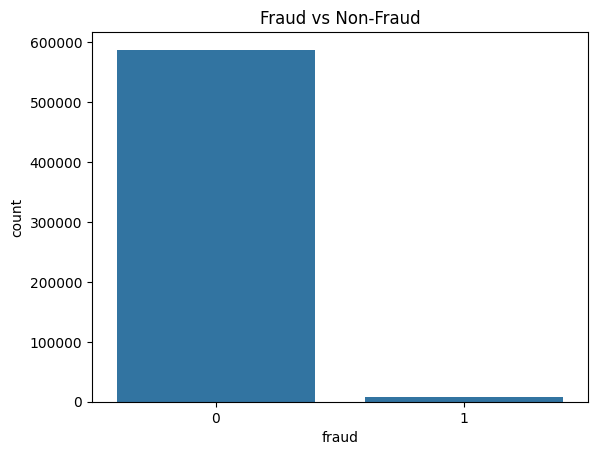

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=y)
plt.title("Fraud vs Non-Fraud")
plt.show()

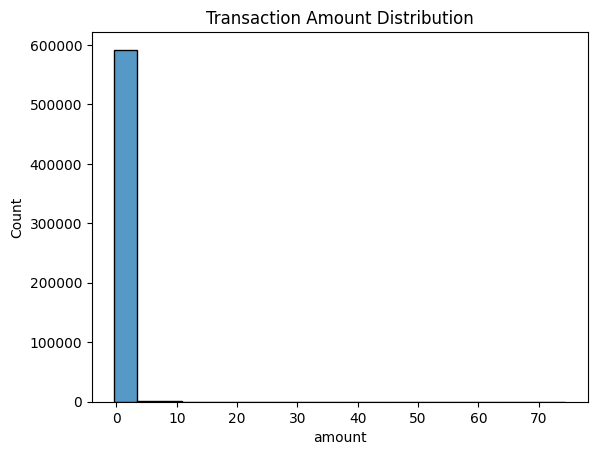

In [79]:
sns.histplot(X['amount'], bins=20)
plt.title("Transaction Amount Distribution")
plt.show()

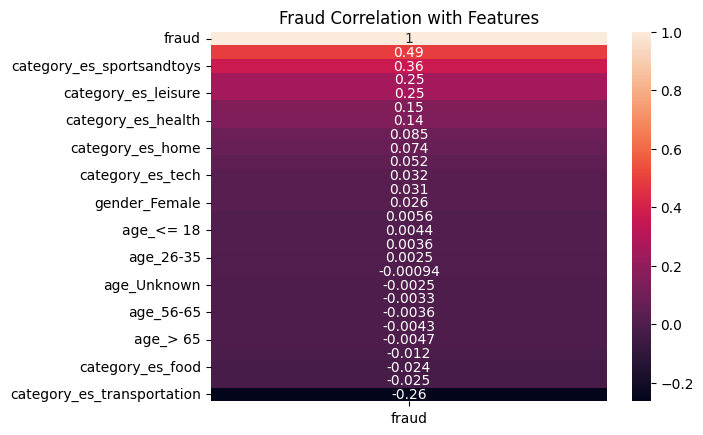

In [47]:
corr = pd.concat([X, y], axis=1).corr()
sns.heatmap(corr[['fraud']].sort_values(by='fraud', ascending=False), annot=True)
plt.title("Fraud Correlation with Features")
plt.show()

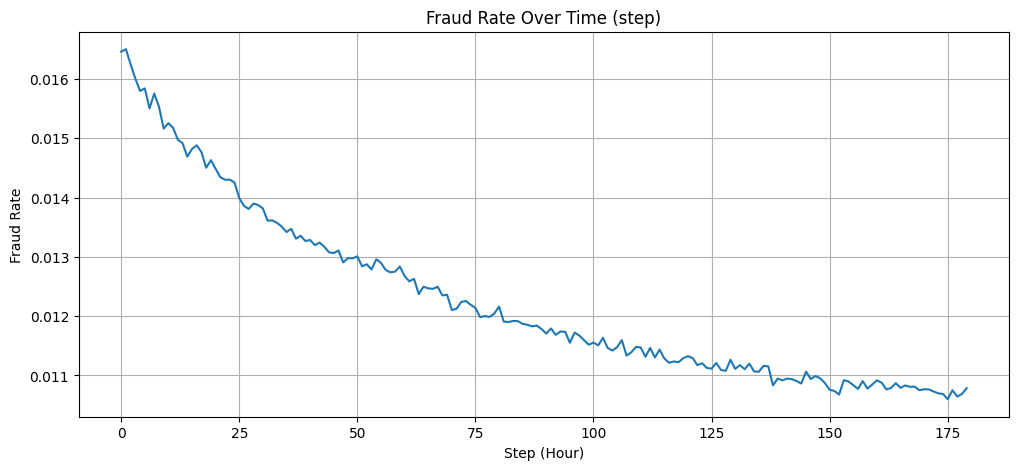

In [48]:
fraud_by_step = df.groupby('step')['fraud'].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(data=fraud_by_step)
plt.title("Fraud Rate Over Time (step)")
plt.xlabel("Step (Hour)")
plt.ylabel("Fraud Rate")
plt.grid(True)
plt.show()

In [49]:
df['step'] = df['step'] % 24

In [50]:
df

,step,merchant,amount,fraud,age_26-35,age_36-45,age_46-55,age_56-65,age_<= 18,age_> 65,...,category_es_home,category_es_hotelservices,category_es_hyper,category_es_leisure,category_es_otherservices,category_es_sportsandtoys,category_es_tech,category_es_transportation,category_es_travel,category_es_wellnessandbeauty
0,0,M348934600,-0.299276,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0,M348934600,0.016067,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0,M1823072687,-0.098742,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,M348934600,-0.185275,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,M348934600,-0.019480,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,11,M1823072687,-0.155832,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
594639,11,M1823072687,0.115256,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
594640,11,M349281107,-0.138687,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
594641,11,M1823072687,-0.210319,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
joblib.dump(X_train.columns.tolist(), "expected_columns.pkl")

['expected_columns.pkl']

In [53]:
import joblib

In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
joblib.dump(model, 'fraud_model.pkl')
joblib.dump(X.columns.tolist(), 'model_features.pkl')

['model_features.pkl']

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Confusion Matrix:
 [[173697   2491]
 [   849 175429]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    176188
           1       0.99      1.00      0.99    176278

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466

ROC AUC Score: 0.9990559926087229


In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
preds_lr = lr.predict(X_test)
probs_lr = lr.predict_proba(X_test)[:, 1]

print("🔹 Logistic Regression")
print(classification_report(y_test, preds_lr))
print("ROC AUC:", roc_auc_score(y_test, probs_lr))

🔹 Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    176188
           1       0.97      0.98      0.97    176278

    accuracy                           0.97    352466
   macro avg       0.97      0.97      0.97    352466
weighted avg       0.97      0.97      0.97    352466

ROC AUC: 0.9975890696303611


In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
preds_gb = gb.predict(X_test)
probs_gb = gb.predict_proba(X_test)[:, 1]

print("🔹 Gradient Boosting")
print(classification_report(y_test, preds_gb))
print("ROC AUC:", roc_auc_score(y_test, probs_gb))

🔹 Gradient Boosting
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    176188
           1       0.96      0.99      0.97    176278

    accuracy                           0.97    352466
   macro avg       0.97      0.97      0.97    352466
weighted avg       0.97      0.97      0.97    352466

ROC AUC: 0.99622820740156


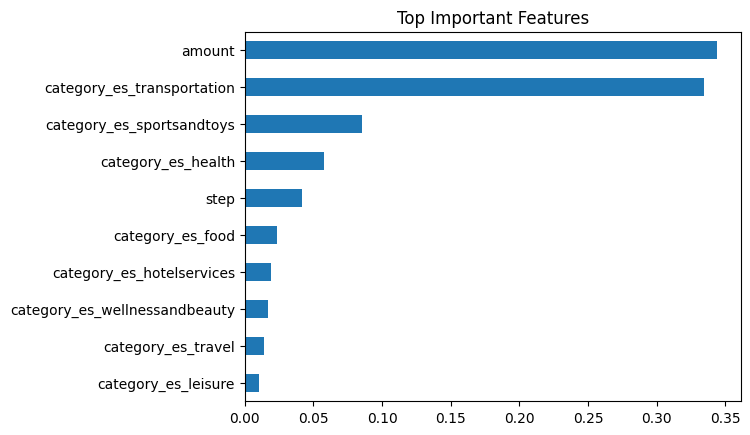

In [58]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(10).plot(kind='barh')
plt.title("Top Important Features")
plt.gca().invert_yaxis()
plt.show()

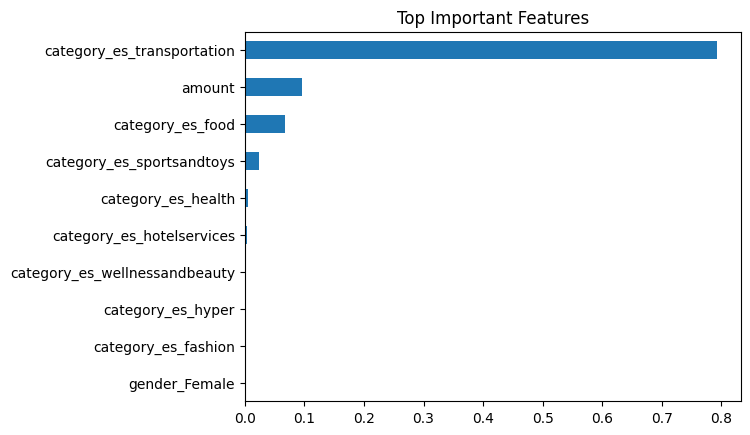

In [59]:
importances = pd.Series(gb.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(10).plot(kind='barh')
plt.title("Top Important Features")
plt.gca().invert_yaxis()
plt.show()

In [60]:
import joblib
joblib.dump(model, 'fraud_model.pkl')

['fraud_model.pkl']

In [61]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [62]:
df.head()


,step,merchant,amount,fraud,age_26-35,age_36-45,age_46-55,age_56-65,age_<= 18,age_> 65,...,category_es_home,category_es_hotelservices,category_es_hyper,category_es_leisure,category_es_otherservices,category_es_sportsandtoys,category_es_tech,category_es_transportation,category_es_travel,category_es_wellnessandbeauty
0,0,M348934600,-0.299276,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0,M348934600,0.016067,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0,M1823072687,-0.098742,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,M348934600,-0.185275,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,M348934600,-0.019480,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [63]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.1 MB/s eta 0:00:00


In [64]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [65]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import joblib

model = joblib.load("fraud_model.pkl")
feature_names = joblib.load("model_features.pkl")
amount_widget = widgets.FloatText(description='Amount:', value=100.0)
age_widget = widgets.Dropdown(options=['<= 18', '19-25', '26-35', '36-45', '46-55', '56-65', '> 65', 'Unknown'], description='Age:')
gender_widget = widgets.Dropdown(options=['Male', 'Female', 'Unknown', 'Enterprise'], description='Gender:')
category_widget = widgets.Dropdown(options=[
    'es_transportation', 'es_health', 'es_others', 'es_food', 'es_hotelservices',
    'es_barsandrestaurants', 'es_tech', 'es_wellnessandbeauty'
], description='Category:')
step_widget = widgets.IntText(description='Step:', value=24)

predict_button = widgets.Button(description="Predict Fraud", button_style='primary')
output = widgets.Output()

def on_predict_clicked(b):
    input_data = dict.fromkeys(feature_names, 0)
    input_data['amount'] = amount_widget.value

    if f"age_{age_widget.value}" in input_data:
        input_data[f"age_{age_widget.value}"] = 1
    if f"gender_{gender_widget.value}" in input_data:
        input_data[f"gender_{gender_widget.value}"] = 1
    if f"category_{category_widget.value}" in input_data:
        input_data[f"category_{category_widget.value}"] = 1
    if f"step_{step_widget.value}" in input_data:
        input_data[f"step_{step_widget.value}"] = 1

    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)[0][1]

    output.clear_output()
    with output:
        if prediction == 1:
            print(f"Fraud Detected! (Confidence: {proba:.2%})")
        else:
            print(f"Benign Transaction. (Confidence: {1 - proba:.2%})")

predict_button.on_click(on_predict_clicked)

display(widgets.VBox([
    amount_widget,
    age_widget,
    gender_widget,
    category_widget,
    step_widget,
    predict_button,
    output
]))
